In [88]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math

The spot is centered in 0.0052,0.0292 at +/- 0.0165,0.0165 s.d.


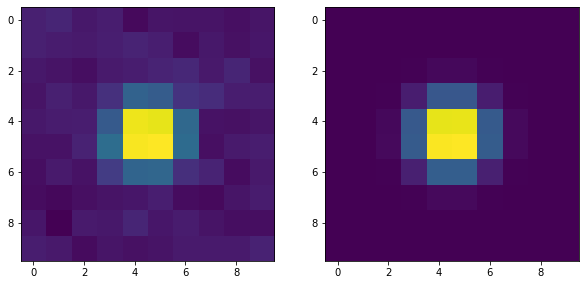

In [100]:
# we define fisrt the Gaussian function we want to fit
# it has to have the form model(x,a,b,c,d,..) where 
# xdata are the coordinates and a,b,c,d are the parameters
def model(xdata, xc, yc):
    x,y = xdata
    im = np.exp(-0.5*((x-xc)**2+(y-yc)**2))
    return im

# let's define a 2D grid on which to evaluate the model 
xi, yi = np.linspace(-n/2,n/2,n), np.linspace(-n/2,n/2,n)
x,y = np.meshgrid(xi,yi)

# we stacks the two flatten array in a single array 
xdata = np.vstack((x.ravel(), y.ravel()))
# we now generate the image
p0 = np.array([0,0])
ydata = model(xdata, p0[0], p0[1]) + 0.02 * np.random.randn(n*n)

# let's display the simulated Gaussian spot
#plt.imshow(ydata.reshape(n,n))

# We can now fit the spot using a non-linear curve fitting procedure
popt, pcov = curve_fit(model, xdata, ydata.ravel(), p0)

# and display the estimated model:
#plt.imshow(model(xdata,popt[0],popt[1]).reshape(n,n))
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].imshow(ydata.reshape(n,n))
ax[1].imshow(model(xdata,popt[0],popt[1]).reshape(n,n))

# and the 2 parameters and their accuracy
print(f'The spot is centered in {popt[0]:.4f},{popt[1]:.4f} at +/- {math.sqrt(pcov[0,0]):.4f},{math.sqrt(pcov[1,1]):.4f} s.d.')

